# Make fancy plot of luminosity of O-type stars

In [1]:
import numpy as np

In [2]:
#Matplotlib configuration
from matplotlib import pyplot as plt

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='Fira Code')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

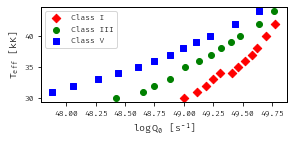

In [3]:
classI = np.genfromtxt('./class_I.csv', delimiter=',')
classIII = np.genfromtxt('./class_III.csv', delimiter=',')
classV = np.genfromtxt('./class_V.csv', delimiter=',')

T_idx = 1
Q0_idx = -2

plt.figure(figsize=MAIN_FIG(0.5))
plt.scatter(classI[:,Q0_idx], classI[:,T_idx], color='r', label='Class I', marker='D')
plt.scatter(classIII[:,Q0_idx], classIII[:,T_idx], color='g', label='Class III', marker='o')
plt.scatter(classV[:,Q0_idx], classV[:,T_idx], color='b', label='Class V', marker='s')
plt.legend()
plt.xlabel('$\log{Q_0}$ [$s^{-1}$]')
plt.ylabel('$T_{eff}$ [kK]')
plt.savefig('../figs/Q0_curve.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

In [4]:
def calc_Rs(Q0):
  N = 0.3 / 100
  Q = 10**(Q0 / 49)
  return 3.2 * (Q**(1/3)) * (N**(-2/3))

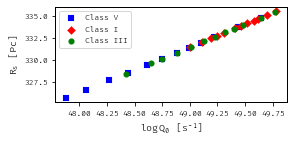

In [5]:
plt.figure(figsize=MAIN_FIG(0.5))
plt.scatter(classV[:,Q0_idx], calc_Rs(classV[:,Q0_idx]),
            color='b', label='Class V', marker='s', linewidths=0.1)
plt.scatter(classI[:,Q0_idx], calc_Rs(classI[:,Q0_idx]),
            color='r', label='Class I', marker='D', linewidths=0.1)
plt.scatter(classIII[:,Q0_idx], calc_Rs(classIII[:,Q0_idx]),
            color='g', label='Class III', marker='o', linewidths=0.1)
plt.legend()
plt.xlabel('$\log{Q_0}$ [$s^{-1}$]')
plt.ylabel('$R_s$ [Pc]')
plt.savefig('../figs/Rs_curve.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

# Nu de straal vs number
deze kunnen we vinden met het aantal O-type sterren in de melkweg

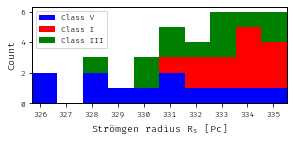

In [6]:
RsV, RsI, RsIII = calc_Rs(classV[:,Q0_idx]), calc_Rs(classI[:,Q0_idx]), calc_Rs(classIII[:,Q0_idx])
bins = 10
plt.figure(figsize=MAIN_FIG(0.5))
n, bins, _ = plt.hist([RsV, RsI, RsIII],
        stacked=True,
        bins=bins,
        color=['b', 'r', 'g'],
        label=['Class V', 'Class I', 'Class III']
)
plt.legend()
plt.xlabel('Strömgen radius $R_s$ [Pc]')
plt.ylabel('Count')
plt.xlim(np.min(bins), np.max(bins))
plt.xticks(np.round(bins[:-1]))
plt.savefig('../figs/Rs_class_bin.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

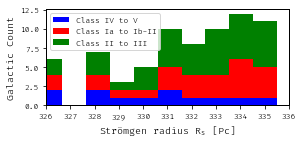

In [7]:
plt.figure(figsize=MAIN_FIG(0.5))
width = bins[1] - bins[0]
plt.bar(bins[:-1], n[0], label='Class IV to V', color='b', width=width, align='edge')
plt.bar(bins[:-1], n[1], label='Class Ia to Ib-II', color='r', width=width, align='edge', bottom=n[0])
plt.bar(bins[:-1], n[2], label='Class II to III', color='g', width=width, align='edge', bottom=(n[0]+n[1]))
plt.legend()
plt.xlabel('Strömgen radius $R_s$ [Pc]')
plt.ylabel('Galactic Count')
plt.xlim(326, 336)
plt.xticks(np.arange(326, 337))
plt.savefig('../figs/Rs_number_bin.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

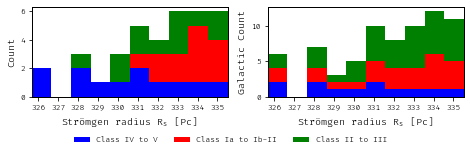

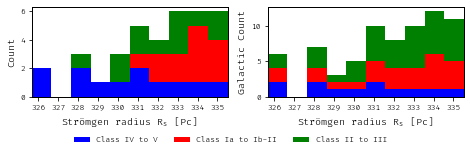

In [8]:
fig = plt.figure(figsize=FULL_FIG(0.3))
ax1, ax2 = fig.subplots(1, 2)
ax1.hist([RsV, RsI, RsIII],
        stacked=True,
        bins=bins,
        color=['b', 'r', 'g'],
        label=['Class V', 'Class I', 'Class III']
)
ax1.set_xlabel('Strömgen radius $R_s$ [Pc]')
ax1.set_ylabel('Count')
ax1.set_xlim(np.min(bins), np.max(bins))
ax1.set_xticks(np.round(bins[:-1]))

width = bins[1] - bins[0]
ax2.bar(bins[:-1], n[0], label='Class IV to V', color='b', width=width, align='edge')
ax2.bar(bins[:-1], n[1], label='Class Ia to Ib-II', color='r', width=width, align='edge', bottom=n[0])
ax2.bar(bins[:-1], n[2], label='Class II to III', color='g', width=width, align='edge', bottom=(n[0]+n[1]))
ax2.set_xlabel('Strömgen radius $R_s$ [Pc]')
ax2.set_ylabel('Galactic Count')
ax2.set_xlim(np.min(bins), np.max(bins))
ax2.set_xticks(np.round(bins[:-1]))

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.15,0), ncol=3, frameon=False)

fig.savefig('../figs/Rs_combiplot.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
fig

In [9]:
#save data
np.savetxt('../tmp/hii_distr.csv', np.concatenate([RsI, RsIII, RsV]))